In [8]:
%load_ext autoreload
%autoreload

import io
import os
import sys
import django
import glob
import json
import re
import requests
from IPython.core.debugger import set_trace
from pathlib import Path
from django.core.files.base import ContentFile
from rest_framework import serializers
from tqdm.notebook import tqdm
from google.cloud import vision
from google.cloud import storage
from PIL import Image, ImageSequence
from gensim.models import Doc2Vec
from IPython.core.debugger import set_trace
import IPython
import collections
from googletrans import Translator
from google.cloud import translate_v2 as translate

parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)
django.setup()

import getch.models as m
from django.db.models import Q
from django.apps import apps
from django_currentuser.middleware import get_current_user

In [90]:
url = 'https://dapi.kakao.com/v2/vision/face/detect'
data = {
    'image_url': 'https://t1.daumcdn.net/alvolo/_vision/openapi/r2/images/01.jpg'
}

header = {
    'Authorization': 'KakaoAK 126234b4fe871fa3cd5ecabe9cce6001',
#     'Content-Type': 'multipart/form-data'
}

res = requests.post(url, data=data, headers=header)

In [75]:
res.json()

{'msg': 'Internal error', 'code': 500}

In [12]:
_pix = m.Pix.objects.last()

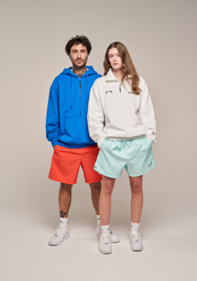

In [126]:
# path = _pix.src
path = _post.pix
img = Image.open('커플2.png')
img.resize((int(img.width / 2), int(img.height / 2)))

In [127]:
byte_io = io.BytesIO()
img.save(byte_io, format='PNG')
byte_io.seek(0)

0

In [128]:
files = { 'image': byte_io }
# data = { 'image_url': _post.pix.url }
# res = requests.post(url, data=data, headers=header)
res = requests.post(url, files=files, headers=header)

In [130]:
res.json()['result']['faces']

[{'facial_attributes': {'gender': {'male': 0.06537694483995438,
    'female': 0.9346230030059814},
   'age': 37.85869216918945},
  'facial_points': {'left_eyebrow': [[0.5888282297141268, 0.192696631290493],
    [0.5957609622707979, 0.19053731441814717],
    [0.6033816556685975, 0.18951564667682347],
    [0.6107694545396162, 0.19027650401950008],
    [0.6164647819381742, 0.19328460789051014]],
   'jaw': [[0.551962760081652, 0.20258254162810974],
    [0.5526342999188638, 0.20941003926493448],
    [0.5541146274968372, 0.21631500924960356],
    [0.5564942149406945, 0.22294754632150693],
    [0.5599016982731048, 0.22941870144252338],
    [0.5648626075232516, 0.2353115820113745],
    [0.5714254608488851, 0.24024284449518143],
    [0.5789922931432782, 0.24390021738575504],
    [0.5883444378288947, 0.24492853843473197],
    [0.598648500663031, 0.2435636408996776],
    [0.6082323870625232, 0.23967087793606173],
    [0.6166355193198196, 0.2346593547351192],
    [0.6227823598422642, 0.22825803441

In [131]:
from datetime import datetime

In [134]:
str(datetime.now())

'2021-03-31 17:26:52.716788'

In [ ]:
장고 post 모델에서 pix 저장할때, 2021-03-31_172652.716788__blob 으로 저장된다
blob이, formdata에서 넘어온 파일 이름이다
요걸 그냥 blob.png 로만 바꿔줘도 될듯하다
에초에 blob은 image/png로 생성됐기에
